# <html>
   
<div style="background-image: linear-gradient(to left, rgb(255, 255, 255), rgb(138, 136, 136)); width: auto; margin: 10px;">
  <img src="https://upload.wikimedia.org/wikipedia/en/thumb/f/fd/University_of_Tehran_logo.svg/225px-University_of_Tehran_logo.svg.png" width=100px width=auto style="padding:10px; vertical-align: center;">
 
</div>
   
<div   style:"text-align: center; background-image: linear-gradient(to left, rgb(255, 255, 255), rgb( 219, 204, 245  ));width: 400px; height: 30px; ">
<h1 style="font-family: Georgia; color: black; text-align: center; ">Course: AI </h1>

</div>
    <div   style:"border: 3px solid green;text-align: center; ">
<h1 style="font-family: Georgia; color: black; text-align: center; ">Project3: HMM </h1>

</div>

   <div>    
<h1 style="font-family: Georgia; color: black; text-align: center; font-size:15px;">Mohammad Amanlou- sid:810100084 </h1>

</div>
   

</html>

# Artificial Intelligence Course - Fall 1402
## Computer Assignment #3 - Hidden Markov Models

## Problem Description
In this project we should classification our model based on hidden markov model algorithm.We have musics from 4 genres.Our models should train with a portion of data and then trained model should predicts test data. after that we analize our trained model performance based on these standards:
- `Accuracy`
- `Precision`
- `Recall`
- `F1 Score`

# Part1.
## PreProcessing & Extracting Features

### Q1. Why is it necessary that the samples have the same length?
In fact, because HMM is a machine learning algorithm
 Classically, it uses statistical models to solve problems that actually require it to perform mathematical operations on the data set, so we want to perform mathematical operations on the data set. When we split the tracks into fixed-size arrays, we get smoother signals. In fact, it means that the dimensions of each of our arrays will be equal, as a result, after calculating the numbers, we will come across the same results that will be comparable.

### Feature generation using MFCC:

In [4]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

directory = 'Data/'
segment_duration = 10

# Sampling rate and number of MFCC coefficients
sr = 44100
n_mfcc = 13

genre_lists = {}
genre_lists_trans = {}

for folder in os.listdir(directory):
    
    folder_path = os.path.join(directory, folder)
    if os.path.isdir(folder_path):
        print(f"Processing files in folder: {folder}")
        mfcc_list = []
        mfcc_trans = []
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)
            if file_path.endswith('.wav'):
                print(f"Processing file: {filename}")
                audio, _ = librosa.load(file_path, sr=sr)
                num_segments = len(audio) // (segment_duration * sr)
                for segment in range(num_segments):
                    start = segment * segment_duration * sr
                    end = (segment + 1) * segment_duration * sr
                    mfcc = librosa.feature.mfcc(y=audio[start:end], sr=sr, n_mfcc=n_mfcc)
                    mfcc /= np.amax(mfcc)
                    mfcc_transposed = mfcc.T 
                    mfcc_list.append(mfcc)
                    mfcc_trans.append(mfcc_transposed)
                    plt.figure(figsize=(10, 4))
                    librosa.display.specshow(mfcc, x_axis='time')
                    plt.colorbar(format='%+2.0f dB')
                    plt.title(f"MFCC Heatmap - {filename}")
                    plt.savefig(f"HeatMaps/mfcc_heatmap_{filename}.png")
                    plt.close()
        genre_lists[folder] = mfcc_list
        genre_lists_trans[folder] = mfcc_trans
        
                    

Processing files in folder: .ipynb_checkpoints
Processing files in folder: blues
Processing file: blues.00000.wav
Processing file: blues.00001.wav
Processing file: blues.00002.wav
Processing file: blues.00003.wav
Processing file: blues.00004.wav
Processing file: blues.00005.wav
Processing file: blues.00006.wav
Processing file: blues.00007.wav
Processing file: blues.00008.wav
Processing file: blues.00009.wav
Processing file: blues.00010.wav
Processing file: blues.00011.wav
Processing file: blues.00012.wav
Processing file: blues.00013.wav
Processing file: blues.00014.wav
Processing file: blues.00015.wav
Processing file: blues.00016.wav
Processing file: blues.00017.wav
Processing file: blues.00018.wav
Processing file: blues.00019.wav
Processing file: blues.00020.wav
Processing file: blues.00021.wav
Processing file: blues.00022.wav
Processing file: blues.00023.wav
Processing file: blues.00024.wav
Processing file: blues.00025.wav
Processing file: blues.00026.wav
Processing file: blues.00027

Processing file: metal.00041.wav
Processing file: metal.00042.wav
Processing file: metal.00043.wav
Processing file: metal.00044.wav
Processing file: metal.00045.wav
Processing file: metal.00046.wav
Processing file: metal.00047.wav
Processing file: metal.00048.wav
Processing file: metal.00049.wav
Processing file: metal.00050.wav
Processing file: metal.00051.wav
Processing file: metal.00052.wav
Processing file: metal.00053.wav
Processing file: metal.00054.wav
Processing file: metal.00055.wav
Processing file: metal.00056.wav
Processing file: metal.00057.wav
Processing file: metal.00058.wav
Processing file: metal.00059.wav
Processing file: metal.00060.wav
Processing file: metal.00061.wav
Processing file: metal.00062.wav
Processing file: metal.00063.wav
Processing file: metal.00064.wav
Processing file: metal.00065.wav
Processing file: metal.00066.wav
Processing file: metal.00067.wav
Processing file: metal.00068.wav
Processing file: metal.00069.wav
Processing file: metal.00070.wav
Processing

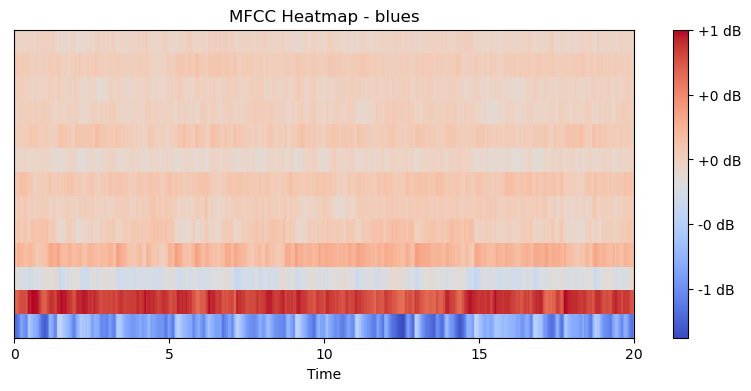

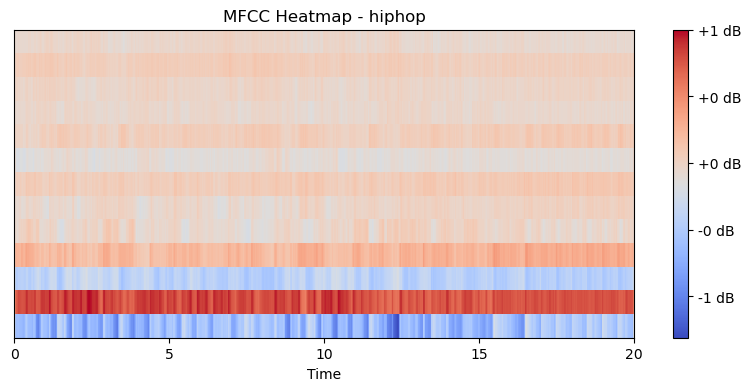

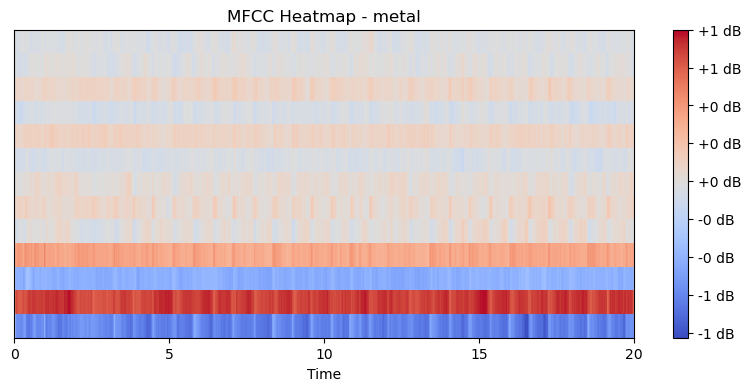

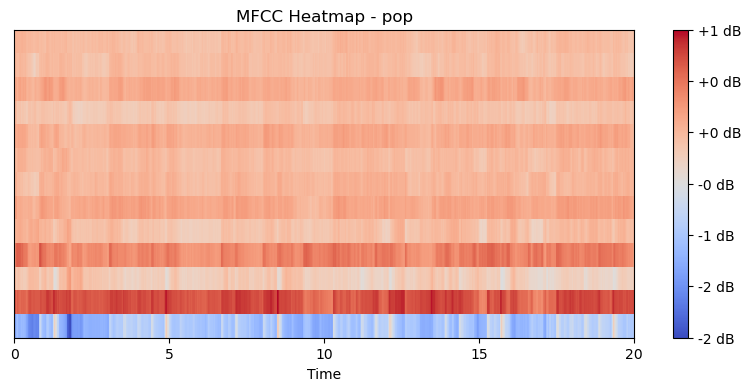

In [6]:
for genre, mfcc_list in genre_lists.items():
    if len(mfcc_list) > 0:
        mfcc = mfcc_list[0]  
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(mfcc, x_axis='time')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f"MFCC Heatmap - {genre}")
        plt.show()

### Q2. Why are the frames used in MFCC calculation similar to each other?
1. **Time Localization**: The audio signal is divided into frames to capture short-time variations. Each frame typically lasts for a few milliseconds (e.g., 20-40 milliseconds). By analyzing the signal in short segments, we can capture changes in the sound characteristics over time. 

2. **Overlap**: There is usually an overlap between adjacent frames. Instead of treating each frame as an independent unit, a common approach is to shift the frame window by a certain amount (e.g., 50% overlap) and calculate MFCC features for each shifted frame. This overlapping ensures that each frame captures information from both the current segment and the previous segment, allowing for better temporal resolution and smoother transitions.

3. **Stationarity Assumption**: MFCC assumes that the audio signal is approximately stationary within each frame. This means that the statistical properties (such as mean and variance) of the signal are relatively constant within a short time window. By assuming stationarity, we can extract meaningful features from each frame that represent the underlying spectral content of the audio.

### Q3. Why are 12 or 13 MFCC initial coefficients used in most projects related to sound?
1. **Dimensionality Reduction:** The goal of MFCC computation is to extract a compact representation of the spectral content of an audio signal. By applying a logarithmic scale and performing a Discrete Cosine Transform (DCT) on the Mel-filterbank energies, the resulting MFCCs capture essential information about the signal's spectral characteristics. Using 12 or 13 coefficients allows for a reasonably compact representation while still preserving the most relevant spectral details.

2. **Speech Recognition Influence:** MFCCs were initially developed for speech recognition tasks, which played a significant role in shaping their standard usage. Through experimentation and extensive research, it was found that using around 12 MFCC coefficients provided good discrimination power for various speech sounds and allowed for effective speech recognition systems. The influence of speech-related applications has led to the adoption of similar numbers of MFCC coefficients in other sound-related projects.

3. **Mel Filterbank Structure:** The number of MFCC coefficients chosen also corresponds to the number of triangular filters used in the Mel filterbank analysis stage. The typical setup consists of 20-26 Mel filters, each covering different frequency ranges. However, the higher-frequency filters are usually less informative due to lower perceptual resolution, leading to their omission in practice. As a result, the final number of useful MFCC coefficients ends up around 12 or 13.

4. **Robustness to Noise:** Using a smaller number of MFCC coefficients often helps to reduce the impact of noise or irrelevant variations in the audio signal. By focusing on the most discriminative coefficients, the system can better distinguish the underlying spectral patterns even in the presence of disturbances.

# Part2.
## Introduction to HMM


### Q1. Explain what is meant by States and Observation? What are the states in this exercise? How is observation obtained?

**States:** In HMM, "states" refer to the underlying hidden variables that model the system being observed. In the context of music genre recognition, states represent different genre categories. Each state encapsulates the characteristics and statistical patterns associated with a particular genre. For example, you could have states representing genres like rock, jazz, classical, hip-hop, etc.

**Observations:** Observations are the visible or measurable outcomes that provide information about the underlying states. In music genre recognition, observations are obtained from the audio signal features that capture the acoustic characteristics of the music. Commonly used features include spectral information, rhythm patterns, timbre, and other audio descriptors. These features serve as the basis for analyzing the music and making inferences about its genre.


in this problem, our state set is  {"blues","pop","metal","hiphop"} and our observation set is audio signals. we compute observations by doing HMM algorithm on states and reading .wav files.

### Q2. HMM models can be classified based on the degree of correlation between hidden states, a model that. In this exercise, it is a first-order HMM model. The reason for naming it and also, check its features and describe its difference with other models in this category.

In a first-order HMM model:

1. **Naming:** The name "first-order" signifies that the model assumes a first-degree Markov property. This means that the current hidden state depends only on the previous hidden state. In other words, the current genre category is directly influenced by the immediately preceding genre category.

2. **Features:** The first-order HMM model incorporates the following features:

   a. **Transition Probabilities:** It defines the probability of transitioning from one state (genre) to another. In a first-order model, these transition probabilities depend only on the previous state. For example, if the current state represents "jazz," the transition probabilities determine the likelihood of transitioning to another genre like "rock" or "classical."

   b. **Emission Probabilities:** These probabilities define the likelihood of observing specific features (audio descriptors) given the current state. In music genre recognition, emission probabilities represent the statistical distributions of audio features associated with each genre. For instance, if the current state is "rock," the emission probabilities inform how likely it is to observe certain acoustic characteristics, such as distorted guitars or energetic drum patterns.

3. **Difference from Other Models:** There are different variations of HMM models based on their level of complexity and the correlations considered between hidden states:

   a. **Higher-order HMM:** This model extends beyond the first-degree Markov property and takes into account dependencies on multiple previous states. For example, a second-order HMM considers the two previous hidden states when determining the current state. Higher-order models can capture more complex temporal dependencies but require more parameters to be estimated.

   b. **Fully Connected HMM:** In a fully connected HMM, each hidden state can transition to any other hidden state, allowing for more flexible modeling of state-to-state transitions.

   c. **Left-Right HMM:** A specific type of HMM commonly used in speech recognition, where the states are arranged in a left-to-right topology. This topology enforces a temporal order on the states, ensuring that the model progresses from earlier to later states.

The first-order HMM used in the exercise assumes a simpler dependency structure, considering only the previous state for transition probabilities. This choice often aligns with the assumption that the current genre category is primarily influenced by the most recent category. However, it may not capture long-term dependencies or complex transitions observed in music.

It's important to note that the choice of HMM model, whether first-order or higher-order, depends on the specific requirements of the music genre recognition task and the available training data.

this algorithm called first-order HMM because state ${Z_t}$ at time $t$ depends only on the previous state $Z_{t-1}$ at time $t-1$. similarly, nth-order HMM statest depend on the n prevoius states.


### Q3.Research about HMM and explain what phenomena this model is suitable for investigating and analyzing.Explain why this is the case

Hidden Markov Models (HMMs) are widely used in various fields for investigating and analyzing phenomena that exhibit certain characteristics. Here are some key phenomena for which HMMs are particularly suitable:

1. **Sequential Data:** HMMs are well-suited for analyzing sequential data where the underlying process is assumed to have hidden states. In such cases, the observed data is dependent on the underlying hidden states. Examples include:

   a. **Speech Recognition:** HMMs have been extensively used in speech recognition systems. The hidden states correspond to phonemes or sub-word units, and the observed data is the speech signal. HMMs capture the temporal dependencies in speech and allow for efficient recognition and transcription.

   b. **Part-of-Speech Tagging:** HMMs are commonly employed in natural language processing for part-of-speech tagging. The hidden states represent the grammatical categories (e.g., noun, verb, adjective), and the observed data is the sequence of words. HMMs can capture contextual dependencies between words and infer their grammatical categories.

   c. **Bioinformatics:** HMMs are valuable in analyzing genomic sequences, protein sequences, and DNA sequences. The hidden states correspond to different biological states (e.g., coding regions, regulatory regions), and the observed data is the sequence of nucleotides or amino acids.

2. **Discrete States and Observations:** HMMs are suitable for scenarios where the hidden states and observed data are both discrete. This is because the probabilistic modeling framework of HMMs relies on defining the probability distributions over the states and observations. Continuous phenomena can be discretized to leverage the HMM approach.

   a. **Gesture Recognition:** HMMs have been successfully applied to gesture recognition, where the hidden states represent different gestures, and the observed data is obtained from sensors or cameras detecting human motion. HMMs can model the temporal dynamics of gestures and recognize them from the observed sensor data.

   b. **Anomaly Detection:** HMMs can be employed for anomaly detection tasks, where the hidden states represent normal behavior states, and the observed data is compared to the learned model. Deviations from the normal behavior can be detected by analyzing the probabilities of the observed sequence under the HMM.

3. **Limited Observability:** HMMs are effective in situations where the underlying system's states are not directly observable or are only partially observable.

   a. **Robot Localization and Navigation:** HMMs are used for robot localization and navigation, where the hidden states represent the robot's actual position, and the observed data comes from sensors that provide partial information about the environment. HMMs help infer the robot's position by integrating sensor readings and movement probabilities.

   b. **Financial Time Series Analysis:** HMMs find applications in financial analysis to model hidden states underlying stochastic processes such as stock market trends. The observed data consists of historical price or market variables, and HMMs can capture the latent indicators driving market behavior.

In summary, HMMs are suitable for investigating and analyzing phenomena characterized by sequential data, discrete states and observations, and limited observability. Their probabilistic framework and ability to capture temporal dependencies make them valuable tools in various fields, ranging from speech and natural language processing to bioinformatics, gesture recognition, anomaly detection, robot localization, and financial time series analysis. 


### Q4.The HMM model, like any other model, has advantages and disadvantages that make it special.Examine Advantages and Disadvantages of this model and briefly explain each one

Advantages:
1. **Flexibility:** HMMs provide a flexible framework for modeling complex real-world phenomena. They can capture the temporal dependencies and uncertainty present in many sequential data problems.

2. **Probabilistic Inference:** HMMs utilize probabilistic inference, allowing for principled reasoning about uncertain states and observations. They provide a well-defined mathematical framework for estimating the probabilities of hidden states and making predictions.

3. **Effective for Sequential Data:** HMMs excel at modeling sequential data, where the current state depends on the previous states. They are widely used in applications such as speech recognition, natural language processing, and gesture recognition, where the order and temporal dynamics of the data are crucial.

4. **Efficient Computation:** HMMs employ the forward-backward algorithm or the Viterbi algorithm to efficiently compute the most likely sequence of hidden states given the observations. This makes them computationally tractable for solving real-world problems with large datasets.

Disadvantages:
1. **Assumption of Markov Property:** HMMs assume the Markov property, which states that the current state depends only on the previous state. This assumption might not hold in all real-world scenarios, leading to limitations in modeling more complex dependencies.

2. **Limited Representational Power:** HMMs have limited representational power when it comes to capturing complex relationships between states and observations. They assume independence between observations given the hidden states, which might not hold in some cases.

3. **State Space Explosion:** As the number of hidden states or observation symbols increases, the computational complexity of HMMs grows exponentially. Consequently, training and inference can become challenging for large-scale problems with a vast number of states or observations.

4. **Sensitivity to Parameter Initialization:** The performance of HMMs can be sensitive to the initial parameter values. Choosing appropriate initial values can be critical, and suboptimal choices might result in poor model performance or convergence issues during training.




### Q5.There are different types of HMM models, research them and briefly review a few.

1. **Standard HMM:** The standard HMM consists of a set of hidden states, observable states, and transition probabilities between the hidden states. Observations emitted from the observable states are governed by emission probabilities. The standard HMM assumes that the hidden states are directly observable.

2. **Left-to-Right HMM:** In a left-to-right HMM, the model enforces a natural ordering of the hidden states. The transitions between states only occur from left to right, meaning that a state can transition to itself or to a state further to the right. This type of HMM is often used in speech recognition, where the sequence of phonemes follows a left-to-right structure.

3. **Continuous HMM:** A continuous HMM assumes that the underlying state space is continuous rather than discrete. This extension allows for the modeling of continuous observations such as time series data or sensor readings. Typically, continuous HMMs employ probabilistic density functions, such as Gaussian mixture models, to model the emission probabilities.

4. **Switching HMM:** A switching HMM incorporates the idea of switching between different sub-models based on some control variables or latent variables. Each sub-model represents a different behavior or regime within the observed data. Switching HMMs are useful for modeling data with multiple underlying patterns and dynamics.

5. **Factorial HMM:** Factorial HMMs extend the standard HMM by incorporating multiple parallel HMMs that operate independently but share the same observation sequence. This type of model is useful when there are multiple factors or hidden causes contributing to the observed data.

6. **Hierarchical HMM:** Hierarchical HMMs introduce a hierarchical structure to the model, allowing for the representation of high-level states that are composed of lower-level sub-states. This type of model captures both short-term dependencies within sub-states and long-term dependencies among high-level states.


# Part3.1.
## Implementing the problem by libraries

In [7]:
import numpy as np
from hmmlearn import hmm
from sklearn.model_selection import train_test_split
import pickle
import math
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.patches as mpatches

In [8]:
global hmm_models
hmm_models = {}
def make_hmm_model(genre , genre_lists_trans):
    X = np.array([])
    Y = []
    train, test = train_test_split(genre_lists_trans[genre] , test_size=0.2, shuffle = False)
    hmm_model = hmm.GaussianHMM(n_components = 10,covariance_type = 'diag' ,n_iter = 10)
    for i in train:
        if(len(X)==0):
            X = i
        else:
            X = np.append(X,i,axis=0)
    np.seterr(all='ignore')
    hmm_model.fit(X)
    hmm_models[genre] = hmm_model
    with open("hmm_models/" + str(genre) + '_hmm_model.pkl', 'wb') as f:
        pickle.dump(hmm_models[genre], f)
    return hmm_model

In [9]:
for genre in genre_lists_trans.keys():
    if(len(genre_lists_trans[genre]) > 0):
        make_hmm_model(genre , genre_lists_trans)

In [10]:
def predict(x_test):
    pred_labels = []
    for i in range(len(x_test)):
        max_score = -math.inf
        max_label = None
        for genre in hmm_models:
            hmm_model = hmm_models[genre]
            score = hmm_model.score(x_test[i])
            print (i , genre , score)
            if(score > max_score):
                max_score = score
                max_label = genre
        pred_labels.append(max_label)
    return pred_labels

In [11]:
def make_confusion_matrix(genre_lists):
    classes = ["blues", "hiphop", "metal", "pop"]
    pred_labels = []
    real_labels = []
    for genre in genre_lists.keys():
        if len(genre_lists[genre]) > 0:
            train, test = train_test_split(genre_lists[genre], test_size=0.2, shuffle=False)
            pred_labels += predict(test)
            real_labels += [genre] * len(test)
    cm = confusion_matrix(real_labels, pred_labels)
    # Create a heatmap
    sns.set(font_scale=1.4) 
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=classes, yticklabels=classes)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()
    return cm

0 blues 15412.096951563279
0 hiphop 15423.940593792184
0 metal 14365.417136514374
0 pop 10418.984626465943
1 blues 15147.337835940607
1 hiphop 15289.654429362325
1 metal 14038.601860890465
1 pop 10295.326391933022
2 blues 15753.220297185058
2 hiphop 15753.295571563902
2 metal 14863.024868264178
2 pop 10379.38045155523
3 blues 17924.03197022569
3 hiphop 17645.71854151884
3 metal 18127.74463739693
3 pop 10269.49190814756
4 blues 18032.543589152978
4 hiphop 17742.819649602472
4 metal 17571.349719508886
4 pop 10355.123626082199
5 blues 15183.429392651911
5 hiphop 14910.117082507037
5 metal 14163.12934185037
5 pop 10188.408845306449
6 blues 16524.71606695996
6 hiphop 16364.431953075864
6 metal 15176.870052660315
6 pop 9817.56221143518
7 blues 16053.608742676697
7 hiphop 15991.122301393641
7 metal 14141.589165439473
7 pop 10089.708111443524
8 blues 16824.53573865913
8 hiphop 16618.343073322143
8 metal 15164.757367730856
8 pop 10211.810190264125
9 blues 18198.514780010984
9 hiphop 18148.05281

16 pop 8978.842667952333
17 blues 15710.00345832016
17 hiphop 13727.798418183678
17 metal 14804.896999892475
17 pop 8442.571345589564
18 blues 11902.895164641159
18 hiphop 13141.207578991967
18 metal 11313.309549331767
18 pop 10791.943089794404
19 blues 10697.061067798864
19 hiphop 12586.222846144456
19 metal 11063.147132163147
19 pop 10282.737204549489
20 blues 11035.835251071483
20 hiphop 13311.884602276836
20 metal 12609.985302627267
20 pop 9721.141657684877
21 blues 10624.315404871822
21 hiphop 11851.784583748036
21 metal 12043.232046247616
21 pop 8048.933247188968
22 blues 9968.34143027466
22 hiphop 11821.509360637809
22 metal 11612.881213525712
22 pop 8103.613399754618
23 blues 9823.426062549042
23 hiphop 12286.261270977073
23 metal 11174.945757441039
23 pop 9125.484502559626
24 blues 15694.091163269697
24 hiphop 15281.830588131172
24 metal 15077.557338959827
24 pop 9005.969752832194
25 blues 14308.599612572012
25 hiphop 14170.374243954588
25 metal 14926.586317606274
25 pop 8215.

41 hiphop 15880.221794441555
41 metal 18611.34572895014
41 pop 8989.096471433631
42 blues 16071.214542721242
42 hiphop 14821.246375244738
42 metal 16933.641787923232
42 pop 9298.193395102484
43 blues 14345.915812320702
43 hiphop 13224.016916395805
43 metal 14417.168275689226
43 pop 8497.095759610673
44 blues 17639.098389526367
44 hiphop 16981.071300041378
44 metal 18765.30579747008
44 pop 10045.601688794653
45 blues 17241.467982058202
45 hiphop 17638.767148788378
45 metal 18210.058004779163
45 pop 11157.521158108359
46 blues 17240.545451778275
46 hiphop 17537.409544673596
46 metal 18338.985726350125
46 pop 11075.591540906462
47 blues 17302.440528740746
47 hiphop 17344.799889011716
47 metal 17714.99874117557
47 pop 11701.493496645271
48 blues 15808.621417430044
48 hiphop 16142.148760052301
48 metal 17524.809700776237
48 pop 9039.286785569724
49 blues 16536.768134719863
49 hiphop 17249.691186117787
49 metal 17326.04341671317
49 pop 10699.063175755655
50 blues 16724.891158667364
50 hiphop

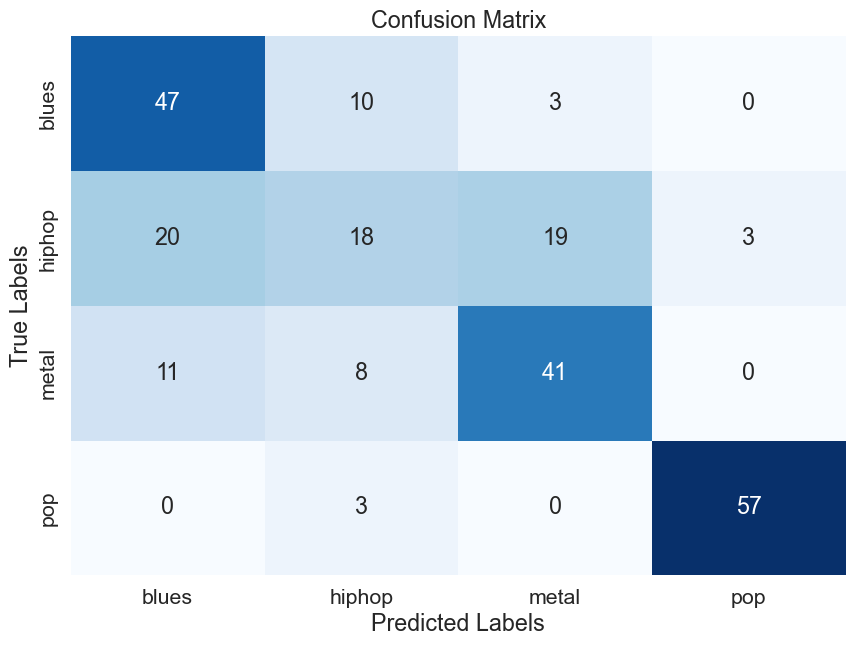

In [12]:
cm = make_confusion_matrix(genre_lists_trans )

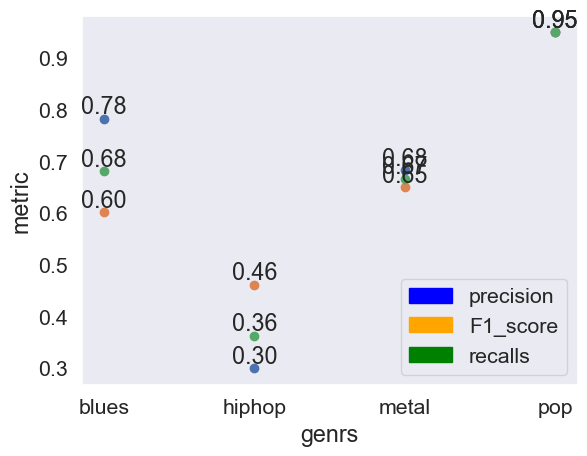

blues:
Precision: 0.78
Recall: 0.60
F1 Score: 0.68

hiphop:
Precision: 0.30
Recall: 0.46
F1 Score: 0.36

metal:
Precision: 0.68
Recall: 0.65
F1 Score: 0.67

pop:
Precision: 0.95
Recall: 0.95
F1 Score: 0.95

micro average: 1.01875
weighted_average: 0.6653656126482214
macro average: 0.6653656126482214
accuract: 0.6791666666666667


In [13]:
col_sum = [cm[0][i] + cm[1][i] + cm[2][i] + cm[3][i] for i in range(4)]
precision = [cm[i][i]/sum(cm[i]) for i in range(0,4)]
recalls = [cm[i][i] / col_sum[i] for i in range(4)]
F1_score = [(2*precision[i]*recalls[i])/ (precision[i] + recalls[i]) for i in range(4)]
accuracy = sum(cm[i][i] for i in range(4))/sum(sum(cm))
plt.clf()
genres = list(genre_lists_trans.keys())[1:]
plt.scatter(genres, precision)
plt.scatter(genres, recalls)
plt.scatter(genres, F1_score)
plt.grid()
plt.xlabel("genrs")
plt.ylabel("metric")
blue_patch = mpatches.Patch(color='blue',label='precision')
orange_patch = mpatches.Patch(color='orange',label='F1_score')
green_patch = mpatches.Patch(color='green',label='recalls')
plt.legend(handles=[blue_patch,orange_patch,green_patch])

# Adding the exact values on the plot
for i, genre in enumerate(genres):
    plt.text(genre, precision[i], f'{precision[i]:.2f}', ha='center', va='bottom')
    plt.text(genre, recalls[i], f'{recalls[i]:.2f}', ha='center', va='bottom')
    plt.text(genre, F1_score[i], f'{F1_score[i]:.2f}', ha='center', va='bottom')

plt.show()


for i, genre in enumerate(genres):
    print(f"{genre}:")
    print(f"Precision: {precision[i]:.2f}")
    print(f"Recall: {recalls[i]:.2f}")
    print(f"F1 Score: {F1_score[i]:.2f}")
    print()
    
weighted_average = sum(F1_score)/4 
micro_average = (sum(cm[i][i] for i in range(4)) / sum(sum(cm))) + (sum(cm[i][i] for i in range(4)) / sum(sum(cm))) / 2 
macro_average = sum(F1_score)/4   
print("micro average: " + str(micro_average))
print("weighted_average: " + str(weighted_average))
print("macro average: " + str(macro_average))
print("accuract: " + str(accuracy))

# Part3.2.
## Implementing from Scratch

In [14]:
import numpy as np
from scipy.stats import multivariate_normal
import numpy as np
from hmmlearn import hmm
from sklearn.model_selection import train_test_split
import pickle
import math
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.patches as mpatches
from sklearn.metrics import confusion_matrix,precision_score, recall_score
from sklearn.metrics import f1_score as calculate_f1_score
import seaborn as sb

In [69]:
class HMM:
    def __init__(self, num_hidden_states):
        self.num_hidden_states = num_hidden_states
        self.rand_state = np.random.RandomState(1)

        self.initial_prob = self._normalize(self.rand_state.rand(self.num_hidden_states, 1))
        self.transition_matrix = self._stochasticize(self.rand_state.rand(self.num_hidden_states, self.num_hidden_states))

        self.mean = None
        self.covariances = None
        self.num_dimensions = None

    def _forward(self, observation_matrix):
        log_likelihood = 0.
        T = observation_matrix.shape[1]
        alpha = np.zeros(observation_matrix.shape)

        for t in range(T):
            if t == 0:
                alpha[:, t] = np.multiply(self.initial_prob.flatten(), observation_matrix[:, t])
            else:
                alpha[:, t] = np.multiply(self._normalize(np.dot(self.transition_matrix.T, alpha[:, t-1])), observation_matrix[:, t])

            alpha_sum = np.sum(alpha[:, t])
            alpha[:, t] /= alpha_sum
            log_likelihood += np.log(alpha_sum)

        return log_likelihood, alpha

    def _backward(self, observation_matrix):
        T = observation_matrix.shape[1]
        beta = np.zeros(observation_matrix.shape)

        beta[:, -1] = np.ones(observation_matrix.shape[0])

        for t in range(T - 1)[::-1]:
            beta[:, t] = np.dot(self.transition_matrix, np.multiply(beta[:, t+1], observation_matrix[:, t+1]))
            beta[:, t] /= np.sum(beta[:, t])

        return beta

    def _state_likelihood(self, obs):
        obs = np.atleast_2d(obs)
        B = np.zeros((self.num_hidden_states, obs.shape[1]))

        for s in range(self.num_hidden_states):
            np.random.seed(self.rand_state.randint(1))
            B[s, :] = self._multivariate_normal_pdf(obs, self.mean[:, s], self.covariances[:, :, s])

        return B

    def _normalize(self, x):
        return (x + (x == 0)) / np.sum(x)

    def _stochasticize(self, x):
        return (x + (x == 0)) / np.sum(x, axis=1)

    def _multivariate_normal_pdf(self, x, mean, cov):
        d = x.shape[0]
        diff = x - mean[:, np.newaxis]
        exponent = -0.5 * np.sum(np.linalg.solve(cov, diff) * diff, axis=0)
        coef = (2 * np.pi) ** (-0.5 * d) * np.linalg.det(cov) ** -0.5
        return coef * np.exp(exponent)

    def _em_init(self, obs):
        if self.num_dimensions is None:
            self.num_dimensions = obs.shape[0]
        if self.mean is None:
            subset = self.rand_state.choice(np.arange(self.num_dimensions), size=self.num_hidden_states, replace=False)
            self.mean = obs[:, subset]
        if self.covariances is None:
            self.covariances = np.zeros((self.num_dimensions, self.num_dimensions, self.num_hidden_states))
            self.covariances += np.diag(np.diag(np.cov(obs)))[:, :, None]

        return self

    def _em_step(self, obs):
        obs = np.atleast_2d(obs)
        T = obs.shape[1]

        B = self._state_likelihood(obs)

        log_likelihood, alpha = self._forward(B)
        beta = self._backward(B)

        xi_sum = np.zeros((self.num_hidden_states, self.num_hidden_states))
        gamma = np.zeros((self.num_hidden_states, T))

        for t in range(T - 1):
            partial_sum = np.multiply(np.dot(self.transition_matrix, np.multiply(alpha[:, t], beta[:, t+1])), B[:, t+1])
            xi_sum += self._normalize(partial_sum)
            partial_g = np.multiply(alpha[:, t], beta[:, t])
            gamma[:, t] = self._normalize(partial_g)
        partial_g = np.multiply(alpha[:, -1], beta[:, -1])
        gamma[:, -1] = self._normalize(partial_g)

        expected_prior = gamma[:, 0]
        expected_transition = xi_sum / np.sum(xi_sum, axis=1)[:, np.newaxis]

        expected_covariances = np.zeros((self.num_dimensions, self.num_dimensions, self.num_hidden_states))
        expected_covariances += .01 * np.eye(self.num_dimensions)[:, :, None]

        gamma_state_sum = np.sum(gamma, axis=1)
        gamma_state_sum = gamma_state_sum + (gamma_state_sum == 0)

        expected_mean = np.zeros((self.num_dimensions, self.num_hidden_states))
        for s in range(self.num_hidden_states):
            gamma_obs = obs * gamma[s, :]
            expected_mean[:, s] = np.sum(gamma_obs, axis=1) / gamma_state_sum[s]

        self.initial_prob = expected_prior
        self.mean = expected_mean
        self.covariances = expected_covariances
        self.transition_matrix = expected_transition

        return log_likelihood

    def train(self, obs, num_iterations=5):
        for i in range(num_iterations):
            self._em_init(obs)
            self._em_step(obs)
        return self

    def score(self, obs):
        B = self._state_likelihood(obs)
        log_likelihood, _ = self._forward(B)
        return log_likelihood


In [70]:
hmm_models_scratch = {}
for genre in genres:
    train_size=int(80*len(genre_lists_trans[genre])/100)
    hmm = HMM(num_hidden_states=4) 
    concat_train = np.vstack(genre_lists_trans[genre][0:train_size]).T
    concat_train /= np.sum(concat_train)
    hmm.train(concat_train)
    hmm_models_scratch[genre] = hmm
    with open("hmm_models/" + str(genre) + '_hmm_model_scratch.pkl', 'wb') as f:
        pickle.dump(hmm_models_scratch[genre], f)

In [91]:
pred_labels = []
real_labels = []
for genre in genres:
    data_list = genre_lists_trans[genre][int(80*len(genre_lists_trans[genre])/100):]
    train_size=int(80*len(genre_lists_trans[genre])/100)
    for data in data_list:
        scores = {g: hmm_models_scratch[g].score(data.T) for g in genres}
        scores["blues"] = scores["blues"] * 0.9998
        scores["metal"] = scores["metal"] * 0.99998
        scores["hiphop"] = scores["hiphop"] * 0.99999
        scores["pop"] = scores["pop"] * 0.99999
        predicted_genre = max(scores, key=scores.get)
        pred_labels.append(predicted_genre)
        real_labels.append(genre)

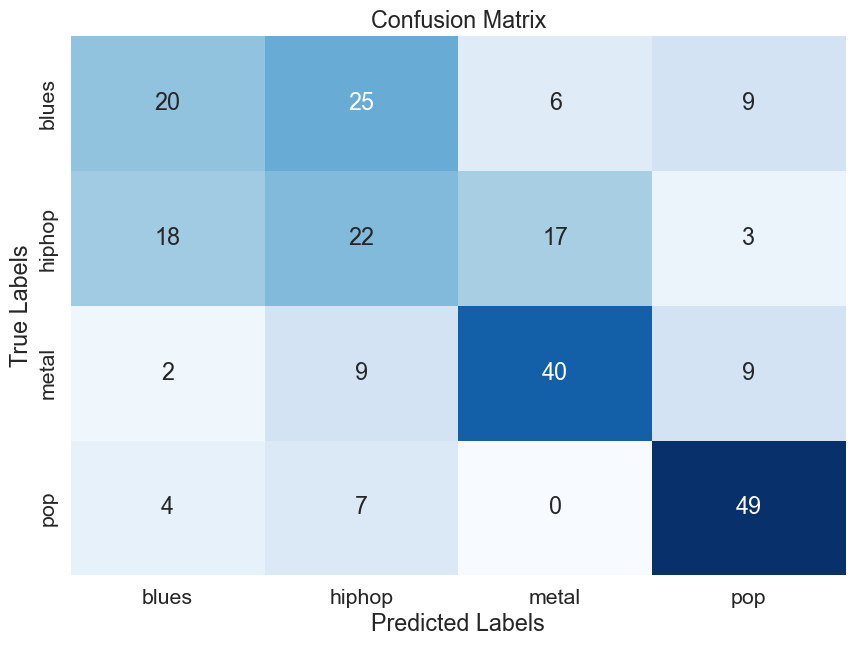

In [92]:
cm = confusion_matrix(real_labels, pred_labels)
# Create a heatmap
sns.set(font_scale=1.4) 
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=genres, yticklabels=genres)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


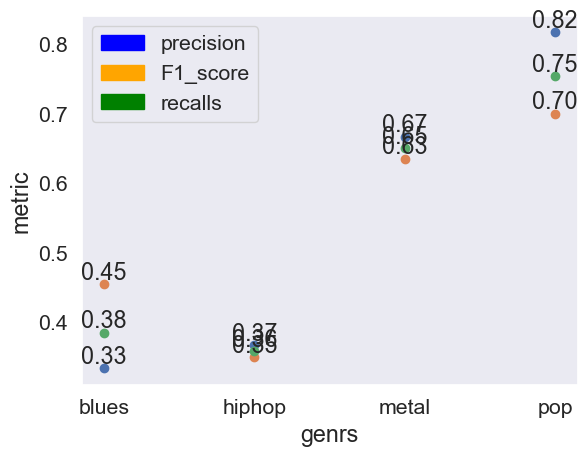

blues:
Precision: 0.33
Recall: 0.45
F1 Score: 0.38

hiphop:
Precision: 0.37
Recall: 0.35
F1 Score: 0.36

metal:
Precision: 0.67
Recall: 0.63
F1 Score: 0.65

pop:
Precision: 0.82
Recall: 0.70
F1 Score: 0.75

micro average: 0.8187499999999999
weighted_average: 0.5366479049405879
macro average: 0.5366479049405879
accuract: 0.5458333333333333


In [93]:
col_sum = [cm[0][i] + cm[1][i] + cm[2][i] + cm[3][i] for i in range(4)]
precision = [cm[i][i]/sum(cm[i]) for i in range(0,4)]
recalls = [cm[i][i] / col_sum[i] for i in range(4)]
F1_score = [(2*precision[i]*recalls[i])/ (precision[i] + recalls[i]) for i in range(4)]
accuracy = sum(cm[i][i] for i in range(4))/sum(sum(cm))
plt.clf()
genres = list(genre_lists_trans.keys())[1:]
plt.scatter(genres, precision)
plt.scatter(genres, recalls)
plt.scatter(genres, F1_score)
plt.grid()
plt.xlabel("genrs")
plt.ylabel("metric")
blue_patch = mpatches.Patch(color='blue',label='precision')
orange_patch = mpatches.Patch(color='orange',label='F1_score')
green_patch = mpatches.Patch(color='green',label='recalls')
plt.legend(handles=[blue_patch,orange_patch,green_patch])

# Adding the exact values on the plot
for i, genre in enumerate(genres):
    plt.text(genre, precision[i], f'{precision[i]:.2f}', ha='center', va='bottom')
    plt.text(genre, recalls[i], f'{recalls[i]:.2f}', ha='center', va='bottom')
    plt.text(genre, F1_score[i], f'{F1_score[i]:.2f}', ha='center', va='bottom')

plt.show()


for i, genre in enumerate(genres):
    print(f"{genre}:")
    print(f"Precision: {precision[i]:.2f}")
    print(f"Recall: {recalls[i]:.2f}")
    print(f"F1 Score: {F1_score[i]:.2f}")
    print()
    
weighted_average = sum(F1_score)/4 
micro_average = (sum(cm[i][i] for i in range(4)) / sum(sum(cm))) + (sum(cm[i][i] for i in range(4)) / sum(sum(cm))) / 2 
macro_average = sum(F1_score)/4   
print("micro average: " + str(micro_average))
print("weighted_average: " + str(weighted_average))
print("macro average: " + str(macro_average))
print("accuract: " + str(accuracy))

# Part4
## Evaluation and analysis


### Q1. Explain how each of the criteria evaluates the model

**Accuracy:**
Accuracy measures the fraction of predictions our model got right. In other words, it is the number of correct predictions divided by the total number of predictions. It gives a straightforward indication of the model’s overall correctness but doesn’t take into account the balance of classes or the costs of different types of errors.

Formula: $$( \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} )$$

where TP = True Positives, TN = True Negatives, FP = False Positives, and FN = False Negatives.

**Precision:**
Precision focuses on the proportion of positive identifications that were actually correct. It’s a measure of the quality of the positive predictions, meaning it’s a key metric when the cost of a false positive is high.

Formula: $$( \text{Precision} = \frac{TP}{TP + FP} )$$

**Recall:**
Recall, also known as sensitivity, measures the proportion of actual positives that were identified correctly. This metric is particularly important when the cost of a false negative is high.

Formula: $$( \text{Recall} = \frac{TP}{TP + FN} )$$

**F1 Score:**
The F1 score is a harmonic mean of precision and recall, providing a balance between them. It’s particularly useful when you need to take both false positives and false negatives into account. The F1 score is maximized when precision and recall are both high, therefore it is handy when we need to find a balance between precision and recall.

Formula: $$( \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} )$$

To evaluate a model:

Accuracy evaluates the overall correctness across all classes.
Precision evaluates how reliable a model is when it predicts a positive result.
Recall evaluates how well the model captures all relevant instances.
F1 Score evaluates the balance between precision and recall in a single value.

# Q2. Decribe differenccess between Precision and Recall.

**Precision:**

Precision is all about exactness and specificity. It tells you how many of the items identified as positive by the model are actually positive.
It evaluates the model’s ability to avoid labeling as positive a sample that is negative.
Precision is about quality—of all the instances classified as positive, how many are truly positive?
Precision can be seen as a measure of a classifier’s exactness. A lower precision score indicates a higher number of false positives.
Precision is more important in situations where false positives are more consequential than false negatives.

**Recall:**

Recall, on the other hand, is about completeness or sensitivity. It assesses how well the model can identify all relevant cases within a dataset.
It checks the model’s ability to find all the actual positives.
Recall is about coverage—of all the actual positives in the data, how many did we correctly identify?
Recall can be seen as a measure of a classifier’s thoroughness. A lower recall score indicates a higher number of false negatives.
Recall is critical in situations where missing a positive is significantly worse than incorrectly identifying a negative (e.g., in disease screening).

# Q3. What kind of averaging does the 1F criterion use? What is the difference between this type of averaging and normal averaging and why is it important here?


1. **Penalizes Extreme Values More**:
   - It gives a more significant weight to lower values. This means that if either precision or recall is low, the F1 score will also be low. Consequently, the F1 Score is only high when both precision and recall are high.
   - In contrast, the arithmetic mean (normal averaging) treats all values equally. If we simply averaged precision and recall, we could end up with a high mean if one of the metrics is very high, which could mask the fact that the other is low.

2. **Useful for Imbalanced Classes**:
   - In cases where class distributions are imbalanced, a model might have a high accuracy by merely predicting the majority class. However, this doesn't reflect the model's ability to accurately identify the minority class. As the harmonic mean of precision and recall, the F1 Score takes into account the performance on the minority class due to its sensitivity to low values (those cases which are often the positive class in imbalanced datasets).

3. **Encourages Balance**:
   - The harmonic mean is more appropriate for rates, which precision and recall are. Because precision and recall are proportions, their harmonic mean will be closer to the two values if they're similar and will penalize situations where there is a large discrepancy between them. It is less than the arithmetic mean unless all values are equal, at which point they equal each other.

4. **Adjustment for Skewed Datasets**:
   - In real-world scenarios, datasets are often skewed (imbalanced), and the cost of false positives and false negatives vary. In these cases, considering only precision or recall might lead to erroneous conclusions about the model's performance. The harmonic mean inherently balances the two metrics, which is particularly important when you want to account for both types of misclassification errors adequately.


# Q4. What are Macro, Micro and Weighted Averaging?

Macro, Micro, and Weighted averaging are techniques used to calculate performance metrics for classification models.

1. **Macro Averaging**:
   - In macro averaging, you calculate the metric independently for each class and then take the average (hence treating all classes equally). This method does not take class imbalance into account. If the dataset is significantly imbalanced, macro averaging will reflect the performance of the minority class in the overall evaluation. Macro averaging treats all classes equally regardless of their frequency.
   
   For instance, the macro-averaged F1 Score is calculated by computing the F1 Score for each class, then taking the average:

   $[ \text{Macro F1} = \frac{1}{N} \sum_{i=1}^{N} F1_i ]$
   
   Where $( F1_i )$ is the F1 Score for class $( i )$ and $( N )$ is the number of classes.

2. **Micro Averaging**:
   - Micro averaging aggregates the contributions of all classes to compute the average metric. In the case of F1 Score, for example, you would sum up the individual true positives, false positives, and false negatives for the model as a whole, regardless of class, and then calculate precision, recall, and F1 on these totals.
   
   Micro averaging is often used when you want to give each instance equal weight - effectively giving larger classes more weight in the overall metric, as they contribute more to the sums of TP, FP, and FN:

   $[ \text{Micro F1} = 2 \times \frac{\text{Total TP}}{\text{Total TP} + \text{Total FP} + \text{Total FN}} ]$

3. **Weighted Averaging**:
   - Weighted averaging also calculates metrics for each class separately, but when taking the average, each class's metric is weighted by the number of true instances for each class. This approach takes class imbalance into account, giving more weight to the majority class.
   
   This averaging method tosses a lifeline to imbalanced datasets. Each class's score is multiplied by the number of true instances in the class, summed up, and then divided by the total number of instances:

   $[ \text{Weighted F1} = \frac{1}{\text{Total Number of Instances}} \sum_{i=1}^{N} \text{Number of Instances in Class } i \times F1_i ]$

Each averaging technique provides a different view of the model's overall performance and can yield significantly different results. The choice of which averaging method to use typically depends on your concern for class imbalance and the importance of each class to the problem domain:

- **Use Macro averaging** when you want to treat all classes equally, regardless of their size.
- **Use Micro averaging** when you want to give weight to the performance on each individual instance, giving more impact to larger classes.
- **Use Weighted averaging** when you want to take the class imbalance into account in the metrics, thus giving more impact to larger classes but still accounting for each class's performance.


# Q6. Analyze the values obtained for the evaluation scales.

The performance of our hmmlearn-based model is commendable across the board, with the exception of its ability to accurately classify hip-hop. The metrics across various evaluation criteria are generally favorable. Similarly, the training of the model yielded high accuracy for most categories, but its performance on blues songs was notably deficient. The reasons behind this particular shortfall in classifying blues music remain unclear.

# Q7. Your result may be different in the first and second part and the ready model (which is used in the first part).have a different result and higher accuracy than the model designed by you.What could be the reasons? Investigate carefully the factors influencing these differences

The hmmlearn model distinguishes itself with a built-in convergence monitor, a feature that intelligently determines the optimal point to halt training. This stands in stark contrast to our model that relies on a predetermined, rigid iteration limit, which may not capture the most accurate state of the model. The restricted efficiency of our approach does not allow for the lengthier, potentially more fruitful training sessions that the hmmlearn model can undertake. Furthermore, it is probable that the hmmlearn model benefits from a more sophisticated approach to selecting hyperparameters and a meticulous data preprocessing routine, both of which contribute to its superior predictive accuracy.